In [1]:
import numpy as np
import pandas as pd
from scipy.io import loadmat
import time
import random

from sklearn.svm import SVC

#plot
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
from matplotlib.axes import Axes

In [2]:
def cal_score (y_pred,y_val):
    n11 = 0
    n12 = 0
    n21 = 0
    n22 = 0
    y_pred_array= np.array(y_pred)
    y_val_array= np.array(y_val)
    for j in range(len(y_pred_array)):
        if (y_pred_array[j]==2)&(y_val_array[j]==2):
            n22 = n22+1
        elif (y_pred_array[j]==1)&(y_val_array[j]==2):
            n12 = n12 +1
        elif (y_pred_array[j]==2)&(y_val_array[j]==1):
            n21 = n21+1
        else:
            n11 = n11+1 
    try:       
        Precall = n22 / ( n12 + n22)
        Pprecision = n22 / ( n21 + n22)
        f1_score = 2 / (1/Precall + 1/Pprecision)
        FPR = n21/(n21 + n11)
        FNR = n12/(n12 +n22 )
        BER = 1/2*(FPR+FNR)
        print ("n11:.."+str(n11)+"..n12:.."+str(n12)+"..n21:.."+str(n21)+"..n22:.."+str(n22))
        print ("TPR:"+str(Precall))
        print ("f1 score:" + str(f1_score))
        print ("FPR:"+ str(FPR))
        print ("BER:" + str(BER))
        return Precall,f1_score,BER,FPR
    except Exception as ex:
        print ("divided by zero, just skip")
        return 0,0,0,0

In [3]:
X_train=pd.read_csv("D:\\lab; signal processing\\forStudents\\medData\\train_x_resample3000_boundarysel_50pergroup.csv")
y_train=pd.read_csv("D:\\lab; signal processing\\forStudents\\medData\\train_y_resample3000_boundarysel_50pergroup.csv")
X_val=pd.read_csv("D:\\lab; signal processing\\forStudents\\medData\\scaled_validation_feature.csv")
y_val=pd.read_csv("D:\\lab; signal processing\\forStudents\\medData\\validation_label.csv")
X_train = X_train.drop(["predict_cluster"],axis=1)
y_train = y_train.drop(["predict_cluster"],axis=1)
X_val = X_val.drop(["Unnamed: 0"],axis=1)
y_val = y_val.drop(["Unnamed: 0"],axis=1)

In [4]:
X_train.shape

(248452, 5)

In [5]:
y_train.shape

(248452, 3)

In [6]:
y_train[y_train['label']==1].shape

(199249, 3)

In [17]:
y_train[y_train['label']==2].shape

(49203, 3)

In [18]:
199249/49203

4.049529500233725

In [7]:
X_val.shape

(70027, 5)

In [8]:
#select some of the data randomly
train = {'feature0':X_train['feature0'],'feature1':X_train['feature1'],'feature2':X_train['feature2'],'feature3':X_train['feature3'],'feature4':X_train['feature4'],'label':y_train['label']}
train = pd.DataFrame(data=train)
sample =pd.DataFrame.sample(train,40000)
sample_label = pd.DataFrame(sample['label'])
sample_feature=sample.drop(["label"],axis=1)

In [13]:
sample_label[sample_label['label']==1].shape

(32146, 1)

In [14]:
sample_label[sample_label['label']==2].shape

(7854, 1)

In [15]:
32146/7854

4.092946269416857

In [19]:
svc_clf=SVC(kernel="rbf",degree=len(sample_feature))
svc_clf.fit(sample_feature,sample_label['label'])

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=40000, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [20]:
y_pred=svc_clf.predict(X_val)

In [21]:
y_pred = {"label_pred":y_pred}
y_pred = pd.DataFrame(data=y_pred)
Precall,f1_score,BER,FPR= cal_score(y_pred,y_val['label'])

n11:..57813..n12:..6014..n21:..3394..n22:..2806
TPR:0.318140589569161
f1 score:0.3736351531291612
FPR:0.05545117388533991
BER:0.36865529215808945


In [22]:
#select some of the data randomly
train = {'feature0':X_train['feature0'],'feature1':X_train['feature1'],'feature2':X_train['feature2'],'feature3':X_train['feature3'],'feature4':X_train['feature4'],'label':y_train['label']}
train = pd.DataFrame(data=train)
sample =pd.DataFrame.sample(train,20000)
sample_label = pd.DataFrame(sample['label'])
sample_feature=sample.drop(["label"],axis=1)

svc_clf=SVC(kernel="rbf",degree=len(sample_feature))
svc_clf.fit(sample_feature,sample_label['label'])

y_pred=svc_clf.predict(X_val)

y_pred = {"label_pred":y_pred}
y_pred = pd.DataFrame(data=y_pred)
Precall,f1_score,BER,FPR= cal_score(y_pred,y_val['label'])

n11:..57902..n12:..6071..n21:..3305..n22:..2749
TPR:0.3116780045351474
f1 score:0.3696382950114293
FPR:0.05399709183590112
BER:0.37115954365037684


In [7]:
#select some of the data randomly
train = {'feature0':X_train['feature0'],'feature1':X_train['feature1'],'feature2':X_train['feature2'],'feature3':X_train['feature3'],'feature4':X_train['feature4'],'label':y_train['label']}
train = pd.DataFrame(data=train)
sample =pd.DataFrame.sample(train,10000)
sample_label = pd.DataFrame(sample['label'])
sample_feature=sample.drop(["label"],axis=1)

svc_clf=SVC(kernel="rbf",degree=len(sample_feature))
svc_clf.fit(sample_feature,sample_label['label'])

y_pred=svc_clf.predict(X_val)

y_pred = {"label_pred":y_pred}
y_pred = pd.DataFrame(data=y_pred)
Precall,f1_score,BER,FPR= cal_score(y_pred,y_val['label'])

n11:..58043..n12:..6011..n21:..3164..n22:..2809
TPR:0.31848072562358276
f1 score:0.37977421753532076
FPR:0.05169343375757675
BER:0.366606354066997


In [8]:
#select some of the data randomly
train = {'feature0':X_train['feature0'],'feature1':X_train['feature1'],'feature2':X_train['feature2'],'feature3':X_train['feature3'],'feature4':X_train['feature4'],'label':y_train['label']}
train = pd.DataFrame(data=train)
sample =pd.DataFrame.sample(train,5000)
sample_label = pd.DataFrame(sample['label'])
sample_feature=sample.drop(["label"],axis=1)

svc_clf=SVC(kernel="rbf",degree=len(sample_feature))
svc_clf.fit(sample_feature,sample_label['label'])

y_pred=svc_clf.predict(X_val)

y_pred = {"label_pred":y_pred}
y_pred = pd.DataFrame(data=y_pred)
Precall,f1_score,BER,FPR= cal_score(y_pred,y_val['label'])

n11:..57627..n12:..5860..n21:..3580..n22:..2960
TPR:0.3356009070294785
f1 score:0.38541666666666663
FPR:0.05849004198866143
BER:0.3614445674795915


In [9]:
#select some of the data randomly
train = {'feature0':X_train['feature0'],'feature1':X_train['feature1'],'feature2':X_train['feature2'],'feature3':X_train['feature3'],'feature4':X_train['feature4'],'label':y_train['label']}
train = pd.DataFrame(data=train)
sample =pd.DataFrame.sample(train,3000)
sample_label = pd.DataFrame(sample['label'])
sample_feature=sample.drop(["label"],axis=1)

svc_clf=SVC(kernel="rbf",degree=len(sample_feature))
svc_clf.fit(sample_feature,sample_label['label'])

y_pred=svc_clf.predict(X_val)

y_pred = {"label_pred":y_pred}
y_pred = pd.DataFrame(data=y_pred)
Precall,f1_score,BER,FPR= cal_score(y_pred,y_val['label'])

n11:..58114..n12:..5875..n21:..3093..n22:..2945
TPR:0.33390022675736963
f1 score:0.39641943734015345
FPR:0.050533435718136815
BER:0.3583166044803836


In [11]:
#select some of the data randomly
train = {'feature0':X_train['feature0'],'feature1':X_train['feature1'],'feature2':X_train['feature2'],'feature3':X_train['feature3'],'feature4':X_train['feature4'],'label':y_train['label']}
train = pd.DataFrame(data=train)
sample =pd.DataFrame.sample(train,2000)
sample_label = pd.DataFrame(sample['label'])
sample_feature=sample.drop(["label"],axis=1)

svc_clf=SVC(kernel="rbf",degree=len(sample_feature))
svc_clf.fit(sample_feature,sample_label['label'])

y_pred=svc_clf.predict(X_val)

y_pred = {"label_pred":y_pred}
y_pred = pd.DataFrame(data=y_pred)
Precall,f1_score,BER,FPR= cal_score(y_pred,y_val['label'])

n11:..58405..n12:..6062..n21:..2802..n22:..2758
TPR:0.3126984126984127
f1 score:0.38358831710709324
FPR:0.045779077556488634
BER:0.36654033242903794


In [29]:
def sample_amount_choice (X_train,y_train):
    start = time.time()
    tpr_list = []
    fpr_list = []
    BER_list = []
    f1_score_list = []
    time_list=[]
    sample_amount_list=[]
    sample_amount = 80000;
    train = {'feature0':X_train['feature0'],'feature1':X_train['feature1'],'feature2':X_train['feature2'],'feature3':X_train['feature3'],'feature4':X_train['feature4'],'label':y_train['label']}
    train = pd.DataFrame(data=train)
    
    while (sample_amount>900):
        print ("current sample amount:%d"%sample_amount)
        start1=time.time()
        sample =pd.DataFrame.sample(train,sample_amount)
        sample_label = pd.DataFrame(sample['label'])
        sample_feature=sample.drop(["label"],axis=1)
        
        svc_clf=SVC(kernel="rbf",degree=len(sample_feature))
        svc_clf.fit(sample_feature,sample_label['label'])
        
        y_pred=svc_clf.predict(X_val)
        y_pred = {"label_pred":y_pred}
        y_pred = pd.DataFrame(data=y_pred)
        Precall,f1_score,BER,FPR= cal_score(y_pred,y_val['label'])
        temp = (time.time()-start1)/60
        
        sample_amount_list.append(sample_amount)
        time_list.append(temp)
        tpr_list.append(Precall)
        f1_score_list.append(f1_score)
        BER_list.append(BER)
        fpr_list.append(FPR)
        print ("executing time for this loop: %5.1f minute"%temp)
        print("                             ")
        if (sample_amount >10000):
            sample_amount=int(sample_amount/2)
        elif (sample_amount<=2000 ):
            sample_amount=sample_amount-200
        else:
            sample_amount=sample_amount-2000
    
    print("the total executing time:%5.1fminute"%((time.time()-start)/60))
    return tpr_list, fpr_list, BER_list, f1_score_list,sample_amount_list,time_list
        

In [30]:
tpr_list, fpr_list, BER_list, f1_score_list,sample_amount_list,time_list = sample_amount_choice(X_train,y_train)

current sample amount:80000
n11:..57930..n12:..6081..n21:..3277..n22:..2739
TPR:0.31054421768707485
f1 score:0.3692369911027231
FPR:0.053539627820347345
BER:0.37149770506663626
executing time for this loop:   2.5 minute
                             
current sample amount:40000
n11:..57879..n12:..6105..n21:..3328..n22:..2715
TPR:0.3078231292517007
f1 score:0.3653367422458454
FPR:0.05437286584867744
BER:0.3732748682984884
executing time for this loop:   0.6 minute
                             
current sample amount:20000
n11:..58063..n12:..6258..n21:..3144..n22:..2562
TPR:0.2904761904761905
f1 score:0.3527467988434531
FPR:0.05136667374646691
BER:0.3804452416351382
executing time for this loop:   0.2 minute
                             
current sample amount:10000
n11:..58309..n12:..6037..n21:..2898..n22:..2783
TPR:0.3155328798185941
f1 score:0.3838355975449969
FPR:0.04734752560981587
BER:0.3659073228956109
executing time for this loop:   0.1 minute
                             
current s

In [31]:
boundary_50pergroup={"tpr":tpr_list,"fpr":fpr_list,"BER":BER_list,"f1_score":f1_score_list,"sample_amount":sample_amount_list,"time":time_list}
boundary_50pergroup=pd.DataFrame(data=boundary_50pergroup)

In [32]:
boundary_50pergroup.to_csv("D:\\lab; signal processing\\forStudents\\medData\\result\\SVC_boundary_50pergroup_2.csv",index=True)

In [33]:
boundary_50pergroup

,BER,f1_score,fpr,sample_amount,time,tpr
0,0.371498,0.369237,0.053540,80000,2.539930,0.310544
1,0.373275,0.365337,0.054373,40000,0.609175,0.307823
2,0.380445,0.352747,0.051367,20000,0.227938,0.290476
3,0.365907,0.383836,0.047348,10000,0.095450,0.315533
4,0.356969,0.393307,0.059062,8000,0.074811,0.345125
5,0.353829,0.402450,0.054030,6000,0.054838,0.346372
6,0.346496,0.418134,0.051154,4000,0.039618,0.358163
7,0.383947,0.342876,0.057804,2000,0.024111,0.289909
8,0.375581,0.365050,0.046514,1800,0.023364,0.295351
9,0.381831,0.353564,0.044047,1600,0.020873,0.280385


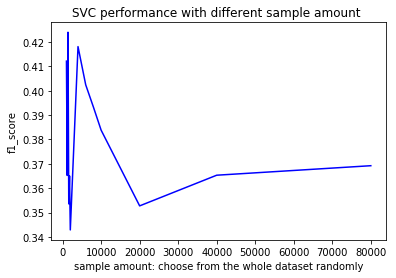

In [34]:
plt.title("SVC performance with different sample amount ")
plt.plot(sample_amount_list,f1_score_list,"b-")
plt.xlabel('sample amount: choose from the whole dataset randomly')
plt.ylabel('f1_score')
plt.show()

In [39]:
def parameter_adjust (X_train,y_train):
    tpr_list = []
    fpr_list = []
    BER_list = []
    f1_score_list = []
    time_list=[]
    gamma_exp_list=[]
    C_exp_list=[]
    train = {'feature0':X_train['feature0'],'feature1':X_train['feature1'],'feature2':X_train['feature2'],'feature3':X_train['feature3'],'feature4':X_train['feature4'],'label':y_train['label']}
    train = pd.DataFrame(data=train)
    sample =pd.DataFrame.sample(train,2000)
    sample_label = pd.DataFrame(sample['label'])
    sample_feature=sample.drop(["label"],axis=1)
    for gamma_exp in [-15,-13,-11,-9,-7,-5,-3,-1,1,3]:
        for C_exp in [-5,-3,-1,1,3,5,7,9,11,13,15]:
            start1=time.time();
            svc_clf=SVC(kernel="rbf",degree=len(sample_feature),gamma=2**gamma_exp,C=2**C_exp)
            svc_clf.fit(sample_feature,sample_label['label'])
            y_pred=svc_clf.predict(X_val)
            y_pred = {"label_pred":y_pred}
            y_pred = pd.DataFrame(data=y_pred)
            print ("curren gamma_exp:"+str(gamma_exp))
            print ("current C_exp:"+str(C_exp))
            Precall,f1_score,BER,FPR= cal_score(y_pred,y_val['label'])
            temp=(time.time()-start1)/60
            time_list.append(temp)
            tpr_list.append(Precall)
            f1_score_list.append(f1_score)
            BER_list.append(BER)
            fpr_list.append(FPR)
            gamma_exp_list.append(gamma_exp)
            C_exp_list.append(C_exp)
            print("fit time:%5.1fminute"%(temp))
            print("            ")
    
    return tpr_list, fpr_list, BER_list, f1_score_list,time_list,gamma_exp_list,C_exp_list

In [40]:
tpr_list, fpr_list, BER_list, f1_score_list,time_list,gamma_exp_list,C_exp_list = parameter_adjust(X_train,y_train)

curren gamma_exp:-15
current C_exp:-5
divided by zero, just skip
fit time:  0.0minute
            
curren gamma_exp:-15
current C_exp:-3
divided by zero, just skip
fit time:  0.0minute
            
curren gamma_exp:-15
current C_exp:-1
divided by zero, just skip
fit time:  0.0minute
            
curren gamma_exp:-15
current C_exp:1
divided by zero, just skip
fit time:  0.0minute
            
curren gamma_exp:-15
current C_exp:3
divided by zero, just skip
fit time:  0.0minute
            
curren gamma_exp:-15
current C_exp:5
n11:..61202..n12:..8674..n21:..5..n22:..146
TPR:0.01655328798185941
f1 score:0.03254932560472634
FPR:8.169000277746009e-05
BER:0.49176420101045903
fit time:  0.0minute
            
curren gamma_exp:-15
current C_exp:7
n11:..59187..n12:..6681..n21:..2020..n22:..2139
TPR:0.2425170068027211
f1 score:0.32960936898066107
FPR:0.033002761122093875
BER:0.3952428771596864
fit time:  0.0minute
            
curren gamma_exp:-15
current C_exp:9
n11:..58366..n12:..6178..n21:..28

curren gamma_exp:-7
current C_exp:-1
n11:..59605..n12:..6853..n21:..1602..n22:..1967
TPR:0.22301587301587303
f1 score:0.3175397530066995
FPR:0.026173476889898215
BER:0.4015788019370126
fit time:  0.0minute
            
curren gamma_exp:-7
current C_exp:1
n11:..59204..n12:..6488..n21:..2003..n22:..2332
TPR:0.26439909297052155
f1 score:0.35454199923983276
FPR:0.03272501511265052
BER:0.38416296107106446
fit time:  0.0minute
            
curren gamma_exp:-7
current C_exp:3
n11:..58968..n12:..6407..n21:..2239..n22:..2413
TPR:0.2735827664399093
f1 score:0.35822446555819476
FPR:0.03658078324374663
BER:0.38149900840191864
fit time:  0.0minute
            
curren gamma_exp:-7
current C_exp:5
n11:..58412..n12:..6200..n21:..2795..n22:..2620
TPR:0.29705215419501135
f1 score:0.36810677906568323
FPR:0.04566471155260019
BER:0.37430627867879446
fit time:  0.0minute
            
curren gamma_exp:-7
current C_exp:7
n11:..58197..n12:..6141..n21:..3010..n22:..2679
TPR:0.30374149659863947
f1 score:0.369288

n11:..54180..n12:..4859..n21:..7027..n22:..3961
TPR:0.44909297052154196
f1 score:0.39993941841680136
FPR:0.11480712990344241
BER:0.33285707969095024
fit time:  0.0minute
            
curren gamma_exp:-1
current C_exp:11
n11:..53909..n12:..5302..n21:..7298..n22:..3518
TPR:0.39886621315192744
f1 score:0.35832145039722957
FPR:0.11923472805398075
BER:0.36018425745102667
fit time:  0.1minute
            
curren gamma_exp:-1
current C_exp:13
n11:..53115..n12:..5315..n21:..8092..n22:..3505
TPR:0.3973922902494331
f1 score:0.34334133320272325
FPR:0.13220710049504142
BER:0.3674074051228041
fit time:  0.1minute
            
curren gamma_exp:-1
current C_exp:15
n11:..52126..n12:..5510..n21:..9081..n22:..3310
TPR:0.37528344671201813
f1 score:0.31210221111687336
FPR:0.148365383044423
BER:0.3865409681662024
fit time:  0.5minute
            
curren gamma_exp:1
current C_exp:-5
divided by zero, just skip
fit time:  0.0minute
            
curren gamma_exp:1
current C_exp:-3
n11:..59746..n12:..8003..n21:

In [42]:
SVC_parameter_adjustment={"tpr":tpr_list,"fpr":fpr_list,"BER":BER_list,"f1_score":f1_score_list,"gamma_exp":gamma_exp_list,"C_exp":C_exp_list,"time_list":time_list}
SVC_parameter_adjustment=pd.DataFrame(data=SVC_parameter_adjustment)

In [43]:
SVC_parameter_adjustment.to_csv("D:\\lab; signal processing\\forStudents\\medData\\result\\SVC_parameter_adjustment.csv",index=True)

In [44]:
SVC_parameter_adjustment

,BER,C_exp,f1_score,fpr,gamma_exp,time_list,tpr
0,0.000000,-5,0.000000,0.000000,-15,0.026932,0.000000
1,0.000000,-3,0.000000,0.000000,-15,0.026689,0.000000
2,0.000000,-1,0.000000,0.000000,-15,0.026890,0.000000
3,0.000000,1,0.000000,0.000000,-15,0.026722,0.000000
4,0.000000,3,0.000000,0.000000,-15,0.027641,0.000000
5,0.491764,5,0.032549,0.000082,-15,0.027750,0.016553
6,0.395243,7,0.329609,0.033003,-15,0.025845,0.242517
7,0.373435,9,0.369433,0.046416,-15,0.025436,0.299546
8,0.368098,11,0.377744,0.050256,-15,0.025403,0.314059
9,0.363701,13,0.386322,0.050190,-15,0.026882,0.322789


In [ ]:
parameter_adjust(X_train,y_train)

curren gamma_exp:-15
current C_exp:-5
divided by zero, just skip
fit time:  0.2minute
            
curren gamma_exp:-15
current C_exp:-3
divided by zero, just skip
fit time:  0.2minute
            
curren gamma_exp:-15
current C_exp:-1
divided by zero, just skip
fit time:  0.2minute
            
curren gamma_exp:-15
current C_exp:1
n11:..61207..n12:..8817..n21:..0..n22:..3
TPR:0.0003401360544217687
f1 score:0.0006800408024481469
FPR:0.0
BER:0.49982993197278913
fit time:  0.2minute
            
curren gamma_exp:-15
current C_exp:3
n11:..59519..n12:..6887..n21:..1688..n22:..1933
TPR:0.2191609977324263
f1 score:0.310746724539828
FPR:0.027578544937670528
BER:0.40420877360262214
fit time:  0.2minute
            
curren gamma_exp:-15
current C_exp:5
n11:..58242..n12:..5994..n21:..2965..n22:..2826
TPR:0.32040816326530613
f1 score:0.3868318390253918
FPR:0.048442171647033835
BER:0.36401700419086386
fit time:  0.2minute
            
curren gamma_exp:-15
current C_exp:7
n11:..57902..n12:..5848..n

curren gamma_exp:-9
current C_exp:13
n11:..58555..n12:..6421..n21:..2652..n22:..2399
TPR:0.2719954648526077
f1 score:0.34590152115925316
FPR:0.043328377473164835
BER:0.38566645631027857
fit time:  0.6minute
            
curren gamma_exp:-9
current C_exp:15
n11:..58401..n12:..6432..n21:..2806..n22:..2388
TPR:0.2707482993197279
f1 score:0.3408020550877694
FPR:0.045844429558710605
BER:0.38754806511949136
fit time:  1.3minute
            
curren gamma_exp:-7
current C_exp:-5
n11:..59770..n12:..7043..n21:..1437..n22:..1777
TPR:0.20147392290249433
f1 score:0.295329898620575
FPR:0.023477706798242032
BER:0.41100189194787384
fit time:  0.2minute
            
curren gamma_exp:-7
current C_exp:-3
n11:..58552..n12:..6078..n21:..2655..n22:..2742
TPR:0.3108843537414966
f1 score:0.38573538721249206
FPR:0.04337739147483131
BER:0.36624651886666737
fit time:  0.2minute
            
curren gamma_exp:-7
current C_exp:-1
n11:..58573..n12:..6195..n21:..2634..n22:..2625
TPR:0.2976190476190476
f1 score:0.3728